In [1]:
import sys
import traceback
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import sparse

import pickle

from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

In [2]:
from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

In [3]:
from recommender import plot_cm, print_results, IO
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise

In [4]:
%%time
# Load data

fig_dir = 'figs/modeling/Las_Vegas/'

data_dir = 'data/Las_Vegas/'
dfb = pd.read_pickle(data_dir + 'business.pkl')
dfr = pd.read_pickle(data_dir + 'review.pkl')
dfu = pd.read_pickle(data_dir + 'user.pkl')
datar = pd.read_pickle(data_dir + 'data_review.pkl')

Wall time: 2.8 s


In [5]:
print(dfb.shape)
print(dfu.shape)
print(datar.shape)

del dfb
del dfu
del dfr

datar.head()

(20434, 93)
(429363, 22)
(1280896, 3)


,user_id,business_id,stars
0,70,6,5
1,71,6,5
2,72,6,5
3,73,6,5
4,74,6,5


In [6]:
# Split the dataset into a training set a test set

X_train, X_test, y_train, y_test = train_test_split(datar[['user_id', 'business_id']].values, datar['stars'].values, \
                                                   test_size=0.4, random_state=0)

In [7]:
models = [ModeClassifier(), RS_surprise(NormalPredictor()), BaselineMean(), BaselineRegression(), \
          RS_surprise(BaselineOnly()), RS_surprise(KNNBasic()), RS_surprise(KNNWithMeans()), RS_surprise(KNNBaseline()), \
          ALS1(), ALS2(), RS_surprise(SVD()), RS_surprise(SVDpp()), RS_surprise(NMF()), RS_surprise(SlopeOne()), \
          RS_surprise(CoClustering())]
model_names = ['Mode estimator', 'Normal predictor*', 'Baseline (mean)', 'Baseline (regression)', \
              'Baseline (ALS)*', 'KNN (basic)*', 'KNN (with means)*', 'KNN (baseline)*', \
              'SVD-ALS1', 'SVD-ALS2', 'SVD-SGD*', 'SVD++-SGD*', 'NMF-SGD*', 'Slope one*', 'Co-clustering*']
test = [True, True, True, True, \
       True, False, False, False, \
       True, True, True, True, True, True, True]
fignames = [fig_dir + str(i) + 'cm.png' for i in range(len(models))]

In [8]:
%%time

estimators = []
is_successful = []

for i, model in enumerate(models):
    try:
        print(model_names[i] + '...')
        if not test[i]:
            print('Estimator not tested')
            estimators.append(model)
            is_successful.append(False)
            print()
            continue
        model.fit(X_train, y_train)
        estimators.append(model)
        print(model_names[i] + ' successful.')
        is_successful.append(True)
        print()
    except:
        traceback.print_exc()
        print(model_names[i] + ' failed.')
        is_successful.append(False)
        print()

try:
    IO(data_dir + 'results/estimators.pkl').to_pickle(estimators)
    print('Saving to pickle successful.')
except:
    traceback.print_exc()
    print('Saving to pickle failed')

IO(data_dir + 'results/is_successful.pkl').to_pickle(is_successful)

Mode estimator...
Mode estimator successful.

Normal predictor*...
Normal predictor* successful.

Baseline (mean)...
Baseline (mean) successful.

Baseline (regression)...
Baseline (regression) successful.

Baseline (ALS)*...
Estimating biases using als...
Baseline (ALS)* successful.

KNN (basic)*...
Estimator not tested

KNN (with means)*...
Estimator not tested

KNN (baseline)*...
Estimator not tested

SVD-ALS1...
SVD-ALS1 successful.

SVD-ALS2...
SVD-ALS2 successful.

SVD-SGD*...
SVD-SGD* successful.

SVD++-SGD*...
SVD++-SGD* successful.

NMF-SGD*...
NMF-SGD* successful.

Slope one*...
Slope one* successful.

Co-clustering*...
Co-clustering* successful.

Saving to pickle successful.
Wall time: 53min 53s


Mode estimator
Fitting time: 0.0 s.
RMSE on training set: 1.9060259820150114.
RMSE on test set: 1.9080984575512219.
r2 on training set: -0.7549418462577282.
r2 on test set: -0.7575530611303833.
Classification accuracy on training set: 0.4425538393076716.
Classification accuracy on test set: 0.4418347291645116.


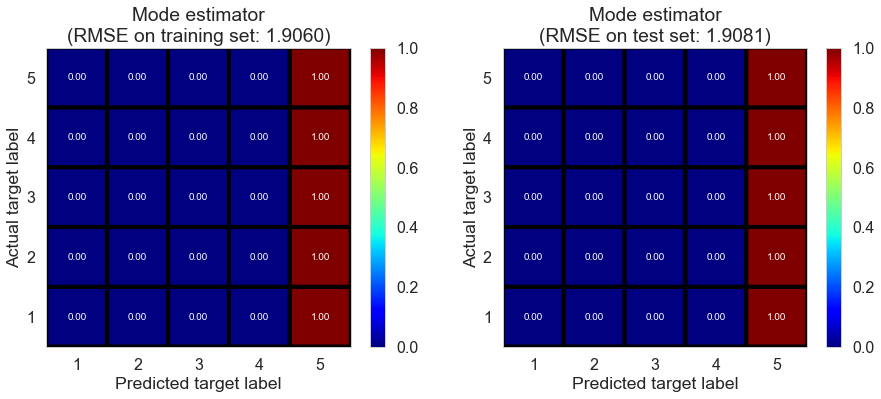


Normal predictor*
Fitting time: 4.398035049438477 s.
RMSE on training set: 1.8565009401040524.
RMSE on test set: 1.8588405692360008.
r2 on training set: -0.6674753257251009.
r2 on test set: -0.6719457793002872.
Classification accuracy on training set: 0.2389865419621957.
Classification accuracy on test set: 0.24032563105166493.


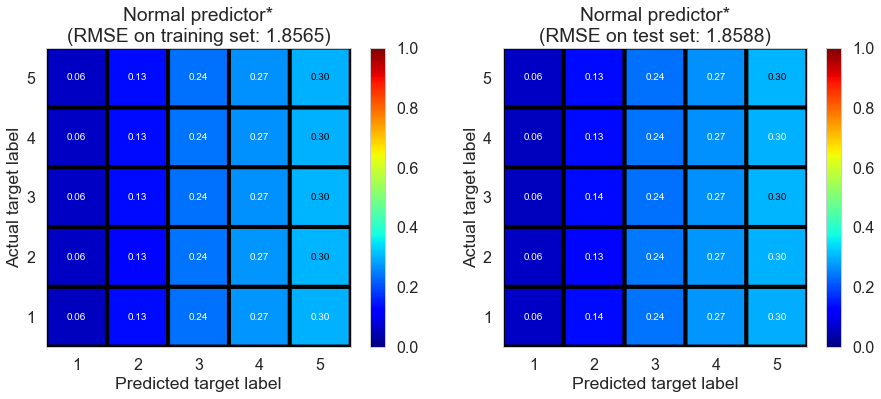


Baseline (mean)
Fitting time: 1.1670362949371338 s.
RMSE on training set: 0.9990457990511132.
RMSE on test set: 1.4158678399375075.
r2 on training set: 0.5178569700500906.
r2 on test set: 0.03227420144792659.
Classification accuracy on training set: 0.5565639650400697.
Classification accuracy on test set: 0.3555846584133391.


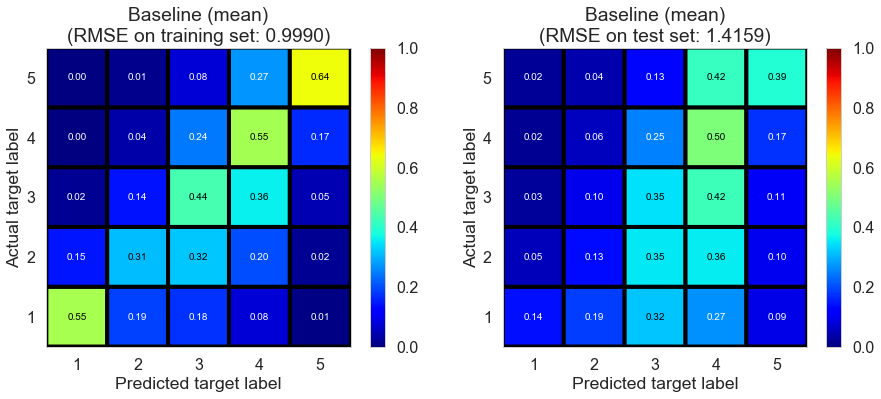


Baseline (regression)
Fitting time: 8.053012371063232 s.
RMSE on training set: 0.9285853674031428.
RMSE on test set: 1.2862531501641201.
r2 on training set: 0.58346761936407.
r2 on test set: 0.20134394747289908.
Classification accuracy on training set: 0.44259417568705217.
Classification accuracy on test set: 0.3228634609717015.


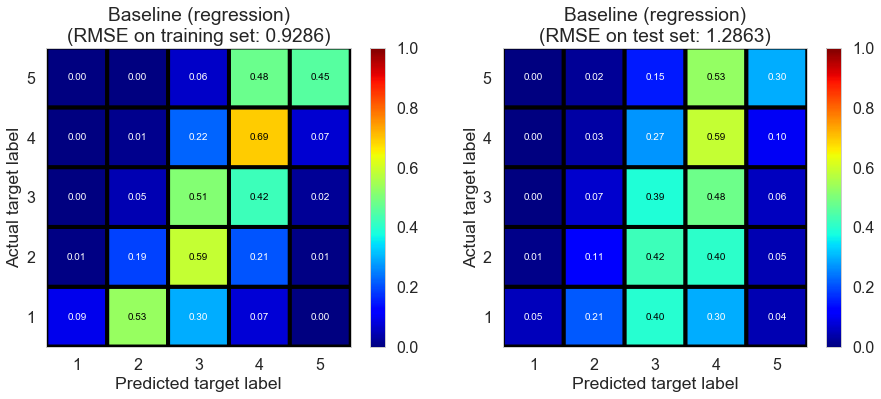


Baseline (ALS)*
Fitting time: 6.7556962966918945 s.
RMSE on training set: 1.1880264598703272.
RMSE on test set: 1.2702753320830638.
r2 on training set: 0.31819948690439837.
r2 on test set: 0.22106249820375146.
Classification accuracy on training set: 0.2880329769419039.
Classification accuracy on test set: 0.26971908368936626.


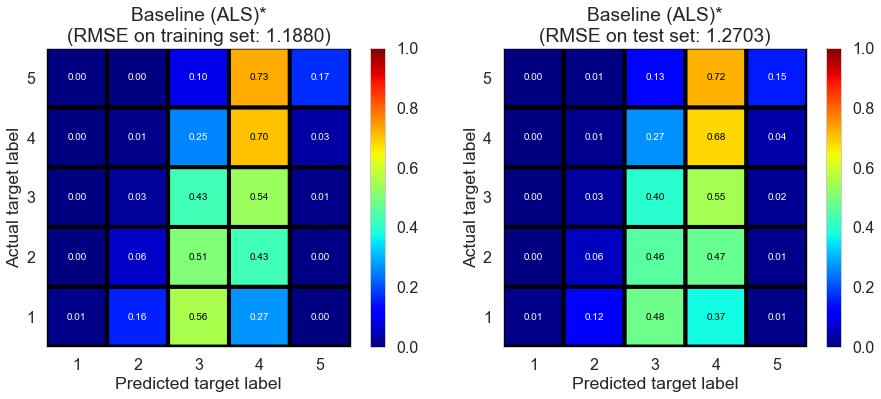


SVD-ALS1
Fitting time: 1243.9107637405396 s.
RMSE on training set: 0.42095164761298065.
RMSE on test set: 1.2792340055675997.
r2 on training set: 0.9144008357812636.
r2 on test set: 0.21003677210340688.
Classification accuracy on training set: 0.8469520660683871.
Classification accuracy on test set: 0.29396575448074497.


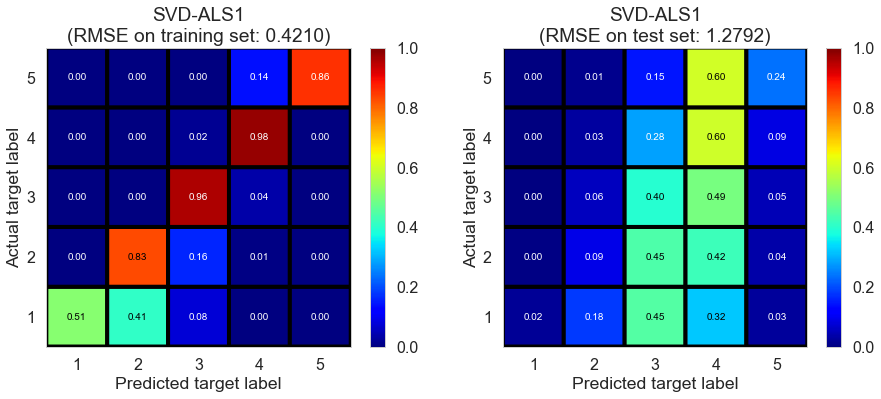


SVD-ALS2
Fitting time: 1300.1855680942535 s.
RMSE on training set: 0.4218202292278688.
RMSE on test set: 1.2867655701728022.
r2 on training set: 0.9140472247830473.
r2 on test set: 0.20070748044509823.
Classification accuracy on training set: 0.842790913124547.
Classification accuracy on test set: 0.27773104405309557.


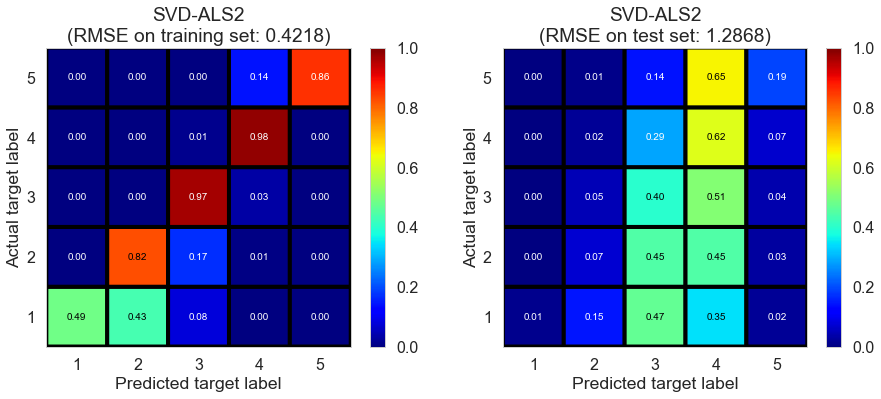


SVD-SGD*
Fitting time: 67.9565212726593 s.
RMSE on training set: 0.7757663515344336.
RMSE on test set: 1.2831344528610642.
r2 on training set: 0.709285312581917.
r2 on test set: 0.2052121547137138.
Classification accuracy on training set: 0.4993773884666581.
Classification accuracy on test set: 0.2857098245566097.


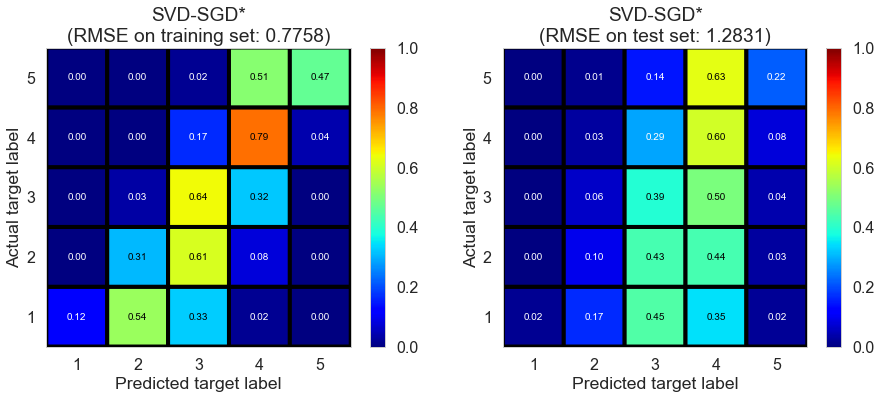


SVD++-SGD*
Fitting time: 346.6872239112854 s.
RMSE on training set: 0.8045843476907689.
RMSE on test set: 1.303443724529599.
r2 on training set: 0.6872853293947555.
r2 on test set: 0.17985346307969663.
Classification accuracy on training set: 0.5147104173253858.
Classification accuracy on test set: 0.28614701800885706.


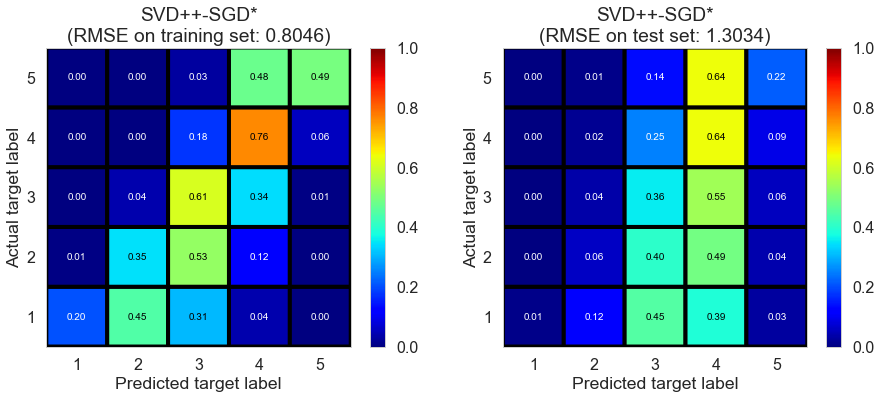


NMF-SGD*
Fitting time: 87.80696773529053 s.
RMSE on training set: 0.4178324101897382.
RMSE on test set: 1.4906362486002174.
r2 on training set: 0.915664709540718.
r2 on test set: -0.07263074347233833.
Classification accuracy on training set: 0.8413765374991705.
Classification accuracy on test set: 0.2647284423617034.


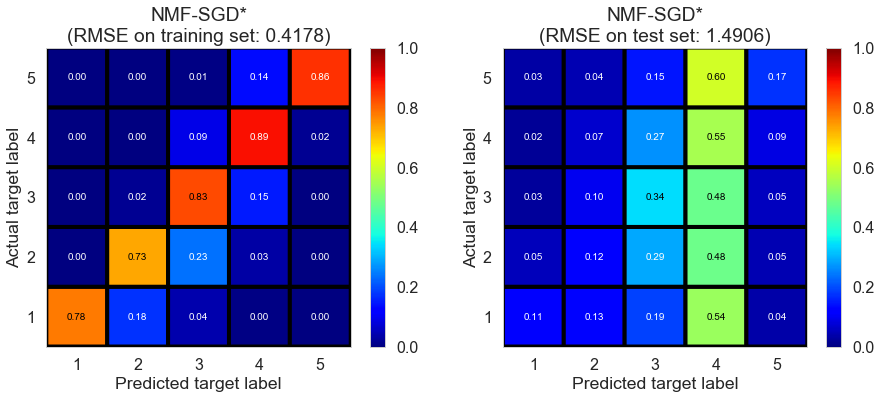


Slope one*
Fitting time: 21.355640172958374 s.
RMSE on training set: 0.4313733027705308.
RMSE on test set: 1.5092978644773736.
r2 on training set: 0.9101099495729806.
r2 on test set: -0.09965587689971134.
Classification accuracy on training set: 0.8245718813798164.
Classification accuracy on test set: 0.29995764688431353.


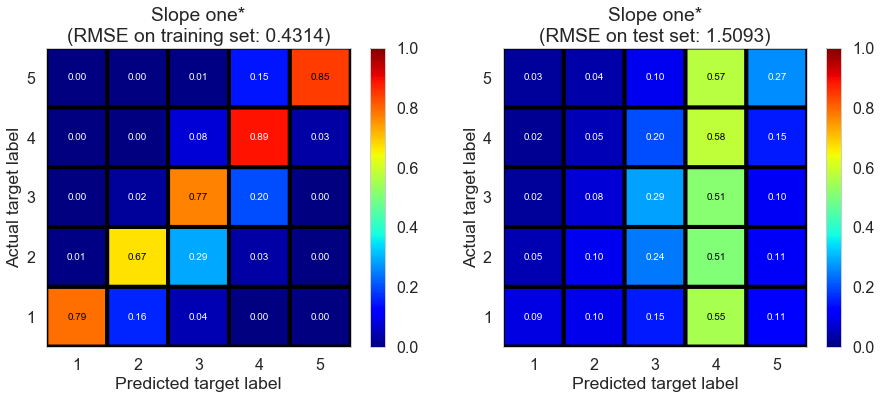


Co-clustering*
Fitting time: 77.61055040359497 s.
RMSE on training set: 0.8555322703708595.
RMSE on test set: 1.435388300778067.
r2 on training set: 0.6464279812812859.
r2 on test set: 0.005406334783392142.
Classification accuracy on training set: 0.5867928284519809.
Classification accuracy on test set: 0.32155968764089243.


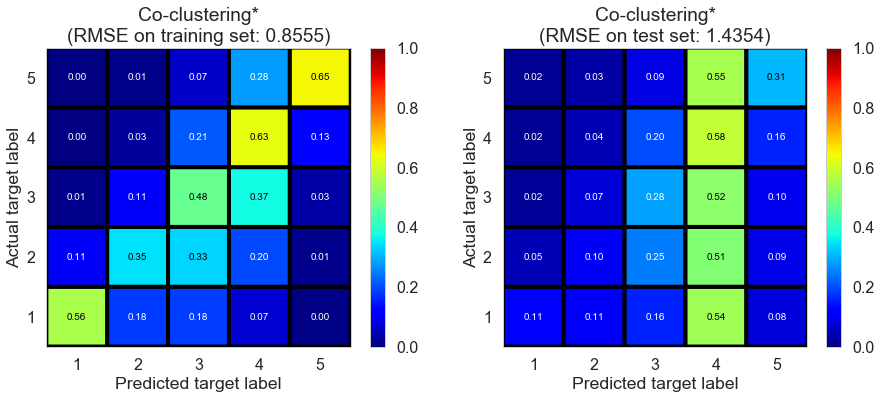


Wall time: 11min 49s


In [9]:
%%time

estimators = IO(data_dir + 'results/estimators.pkl').read_pickle()
is_successful = IO(data_dir + 'results/is_successful.pkl').read_pickle()

for i in range(len(estimators)):
    if is_successful[i]:
        print_results(estimators[i], model_names[i], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                      figname=fignames[i])

del estimators